# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
fifa = pd.read_csv('fifa_data.csv')

fifa

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


# Histogram

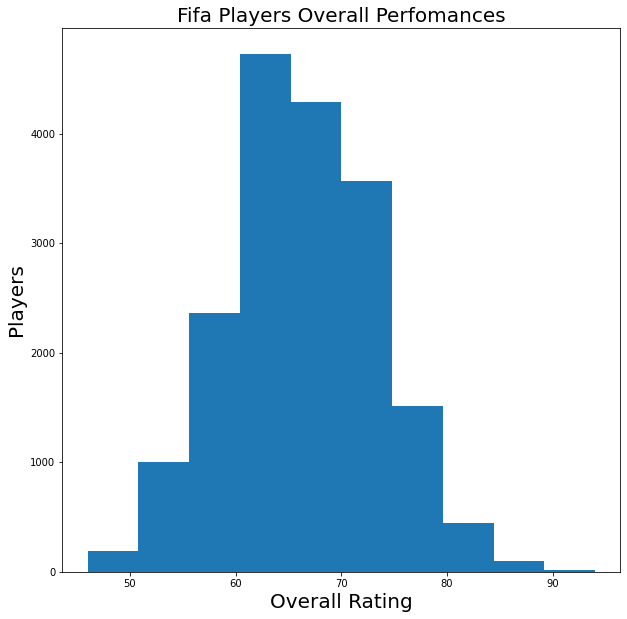

In [5]:
plt.hist(fifa.Overall)

plt.title('Fifa Players Overall Perfomances', fontsize = 20)
plt.xlabel('Overall Rating', fontsize=20)
plt.ylabel('Players', fontsize=20)

plt.rcParams['figure.figsize'] = (10,6)

plt.show()

# Pie Chart

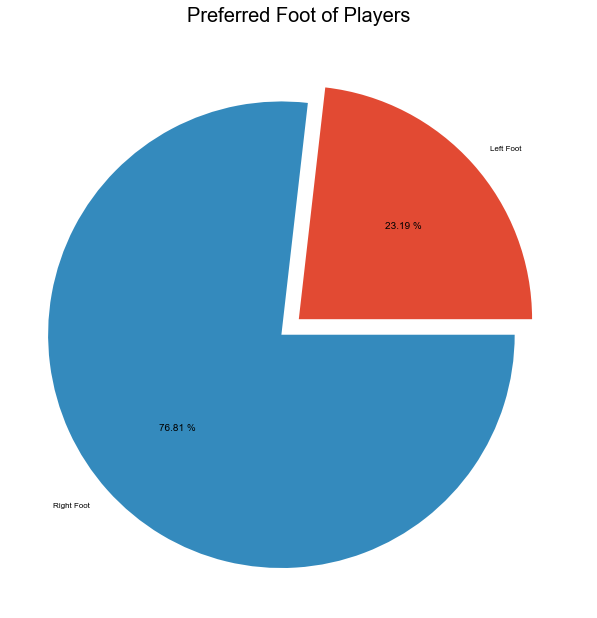

In [47]:
left_foot = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right_foot = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

plt.title('Preferred Foot of Players', fontsize=20)
plt.style.use('ggplot')

labels = ['Left Foot', 'Right Foot']
plt.pie([left_foot, right_foot], explode=[0,0.1] ,labels = labels, autopct='%.2f %%')

plt.rcParams['figure.figsize'] = (10,10)

plt.show()

# Pie Chart No. 2

In [8]:
fifa.Weight.head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [11]:
fifa['Weight'] = [int(x.strip('lbs')) if type(x)== str else x for x in fifa.Weight]

fifa.Weight.head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

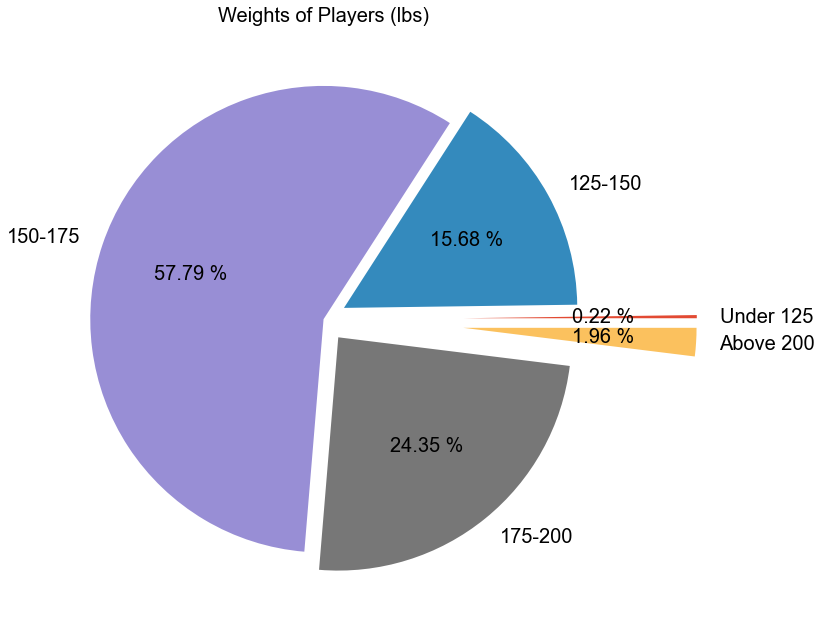

In [51]:
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight <= 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight <= 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight <= 200)].count()[0]
heavy = fifa.loc[(fifa.Weight >= 200)].count()[0]

explode = [0.6,0.1,0,0.1,0.6]

plt.style.use('ggplot')

weights = [light, light_medium, medium, medium_heavy, heavy]

labels = ['Under 125', '125-150', '150-175', '175-200', 'Above 200']
plt.title('Weights of Players (lbs)', fontsize=20)

plt.rcParams['figure.figsize'] = (10,10)

plt.pie(weights, explode=explode, labels = labels, autopct='%.2f %%', textprops={'fontsize':20})

plt.show()

# Box & Whisker Chart

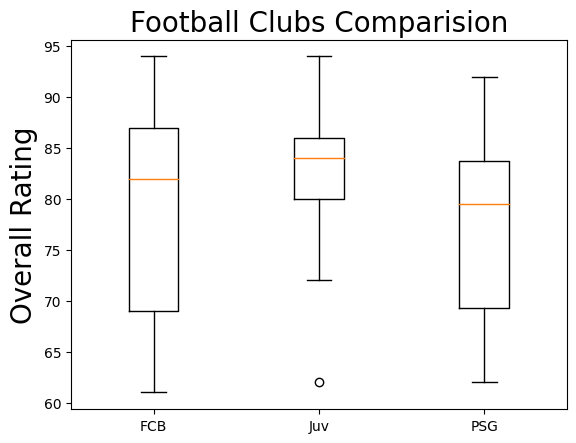

In [82]:
plt.style.use('default')

FCB = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
Juv = fifa.loc[fifa.Club == 'Juventus']['Overall']
PSG = fifa.loc[fifa.Club == 'Paris Saint-Germain']['Overall']

labels = ['FCB', 'Juv', 'PSG']

plt.title('Football Clubs Comparision', fontsize=20)
plt.ylabel('Overall Rating', fontsize=20)

plt.boxplot([FCB, Juv, PSG], labels=labels)
plt.show()